# HOUSING PRICE_PROJECT

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
df= pd.read_csv("HousingDataset.csv")

In [3]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [4]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [7]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [8]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


# Q1. HOW MANY HOUSES ARE THERE WHOSE AREA IS BETWEEN 4000 AND 7000 unit sq. ?

In [9]:
data1 = ((df['area']<7000)&(df['area']>4000)).value_counts()
pd.Series(data1)

False    298
True     247
Name: area, dtype: int64

Thus there are 247 houses whos area is between 4000 and 7000 unit sq.

In [10]:
df[['price','bedrooms','parking']]

,price,bedrooms,parking
0,13300000,4,2
1,12250000,4,3
2,12250000,3,2
3,12215000,4,3
4,11410000,4,2
...,...,...,...
540,1820000,2,2
541,1767150,3,0
542,1750000,2,0
543,1750000,3,0


In [11]:
df.select_dtypes(exclude='int64')

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,yes,no,no,no,yes,yes,furnished
1,yes,no,no,no,yes,no,furnished
2,yes,no,yes,no,no,yes,semi-furnished
3,yes,no,yes,no,yes,yes,furnished
4,yes,yes,yes,no,yes,no,furnished
...,...,...,...,...,...,...,...
540,yes,no,yes,no,no,no,unfurnished
541,no,no,no,no,no,no,semi-furnished
542,yes,no,no,no,no,no,unfurnished
543,no,no,no,no,no,no,furnished


# Q2. DRAW THE REGPLOT B/W PRICE & AREA ?

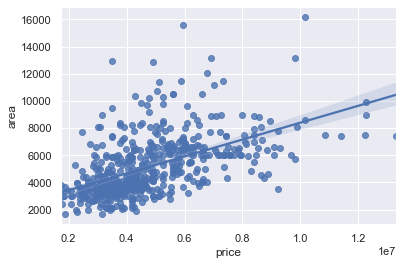

In [12]:
sns.set(style='darkgrid')
sns.regplot(x=df['price'],y=df['area'])

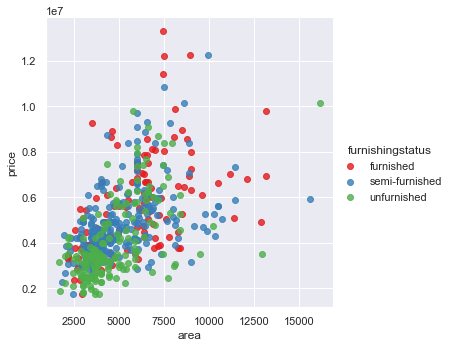

In [13]:
sns.lmplot(x='area',y='price',
          fit_reg=False, legend=True, data=df, hue='furnishingstatus', palette='Set1')

# Q3. SHOW THE BOXPLOT OF PRICE ?

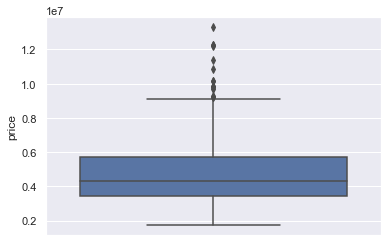

In [14]:
sns.boxplot(y=df["price"])

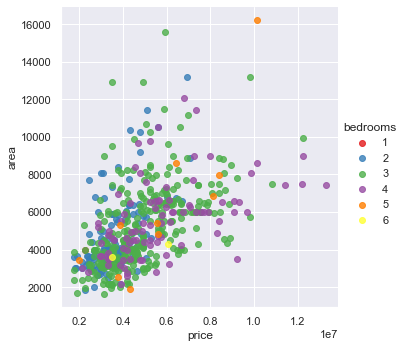

In [15]:
sns.lmplot(x='price',y='area',
          fit_reg=False, legend=True, data=df, hue='bedrooms', palette='Set1')

# Q4. HOW MANY HOUSES ARE THERE WITH 4 BEDROOMS?

In [16]:
pd.Series(df[df['bedrooms']==5]['bedrooms'].count(),index=["4"])

4    10
dtype: int32

There are 10 houses with 4 bedrooms

# Q5. IN WHAT % OF FURNISHINGSTATUS CATEGORISED ?

In [17]:
data1 =(df['furnishingstatus']=='furnished')
print("A=",data1.value_counts())

data2 =(df['furnishingstatus']=='semi-furnished')
print("B=",data2.value_counts())

data3 =(df['furnishingstatus']=='unfurnished')
print("C=",data3.value_counts())

A= False    405
True     140
Name: furnishingstatus, dtype: int64
B= False    318
True     227
Name: furnishingstatus, dtype: int64
C= False    367
True     178
Name: furnishingstatus, dtype: int64


In [18]:
a=df['furnishingstatus'].unique()
a

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

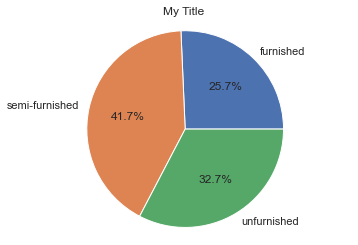

In [19]:
Category_furnished = ['140','227','178']
Category_labels = ['furnished', 'semi-furnished', 'unfurnished']
plt.pie(Category_furnished, labels= Category_labels,autopct='%1.1f%%')
plt.title('My Title')
plt.axis('equal')
plt.show()

Thus,
furnished condition = 25.7%
semi-furnished condition = 41.7%
unfurnished = 32.7%

# Q6. Find the correlation btw the area and price.

In [20]:
df['area'].corr(df['price'])

0.5359973457780797

# Q7. How many houses have air conditioning?

In [21]:
s=df[df['airconditioning']=='no']
m=pd.Series(s.index).count()
pd.Series(m,index=['Have airconditioning'])

Have airconditioning    373
dtype: int32

There are 373 houses with air conditioning.